## Практическое задание

<ol>
    <li>Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.
    </li>
    <li>Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.
    </li>
</ol>

In [1]:
from __future__ import print_function
import keras
from keras.applications import ResNet50
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
import os

# Установка параметров нейросети
batch_size = 32
num_classes = 1000
epochs = 10

# Загрузка данных cifar10
# (x_train, y_train), (x_test, y_test) = imagenet.load_data() cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

# Создание предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10


C:\Users\AlenWolker\AppData\Local\Temp\ipykernel_28996\2395678423.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


1562/1562 [==============================] - 1590s 1s/step - loss: 74550.7422 - accuracy: 0.0000e+00 - val_loss: 73324.6016 - val_accuracy: 0.0000e+00
Epoch 2/10
1562/1562 [==============================] - 1756s 1s/step - loss: 140622.2500 - accuracy: 0.0000e+00 - val_loss: 175945.0781 - val_accuracy: 0.0000e+00
Epoch 3/10
1562/1562 [==============================] - 1551s 993ms/step - loss: 194375.9062 - accuracy: 0.0000e+00 - val_loss: 206717.9375 - val_accuracy: 0.0000e+00
Epoch 4/10
1562/1562 [==============================] - 1521s 974ms/step - loss: 242952.5469 - accuracy: 0.0000e+00 - val_loss: 291568.0625 - val_accuracy: 0.0000e+00
Epoch 5/10
1562/1562 [==============================] - 1534s 982ms/step - loss: 296169.2188 - accuracy: 0.0000e+00 - val_loss: 308826.5312 - val_accuracy: 0.0000e+00
Epoch 6/10
1562/1562 [==============================] - 1521s 973ms/step - loss: 351545.1250 - accuracy: 0.0000e+00 - val_loss: 308049.7812 - val_accuracy: 0.0000e+00
Epoch 7/10
1562/1

C:\Users\AlenWolker\AppData\Local\Temp\ipykernel_28996\2395678423.py:49: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)


Test loss: 403939.46875
Test accuracy: 0.0


In [2]:
# Установка параметров нейросети
batch_size = 64
num_classes = 1000
epochs = 4
# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)
# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4


C:\Users\AlenWolker\AppData\Local\Temp\ipykernel_28996\1142731242.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


781/781 [==============================] - 715s 908ms/step - loss: 39444.8125 - accuracy: 0.0981 - val_loss: 44405.4062 - val_accuracy: 0.0000e+00
Epoch 2/4
781/781 [==============================] - 706s 904ms/step - loss: 27558.8438 - accuracy: 0.0995 - val_loss: 23206.7910 - val_accuracy: 0.0000e+00
Epoch 3/4
781/781 [==============================] - 707s 906ms/step - loss: 19452.6895 - accuracy: 0.1003 - val_loss: 31491.7695 - val_accuracy: 0.0000e+00
Epoch 4/4
781/781 [==============================] - 707s 905ms/step - loss: 13665.4922 - accuracy: 0.1039 - val_loss: 10698.7871 - val_accuracy: 0.0000e+00


C:\Users\AlenWolker\AppData\Local\Temp\ipykernel_28996\1142731242.py:21: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)


Test loss: 10763.53515625
Test accuracy: 0.0


In [10]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from keras import regularizers, optimizers
import os

# Set the neural network parameters
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_model.h5'



In [11]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [12]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

### Base Model
два простых сверточных слоя с 32 фильтрами каждый, входная форма 32323, и активация будет повторена

In [13]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [15]:
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4941 - accuracy: 0.4606 - val_loss: 1.2667 - val_accuracy: 0.5481
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1686 - accuracy: 0.5886 - val_loss: 1.1417 - val_accuracy: 0.6001
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0198 - accuracy: 0.6425 - val_loss: 1.0516 - val_accuracy: 0.6304
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9221 - accuracy: 0.6794 - val_loss: 1.0501 - val_accuracy: 0.6393
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8416 - accuracy: 0.7079 - val_loss: 1.0111 - val_accuracy: 0.6530
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7765 - accuracy: 0.7287 - val_loss: 1.0006 - val_accuracy: 0.6613
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7081 - accuracy: 0.7519 - val_loss: 0.9493 -

In [16]:
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.8613 - accuracy: 0.6723
Test Accuracy: 0.6722999811172485


<Axes: >

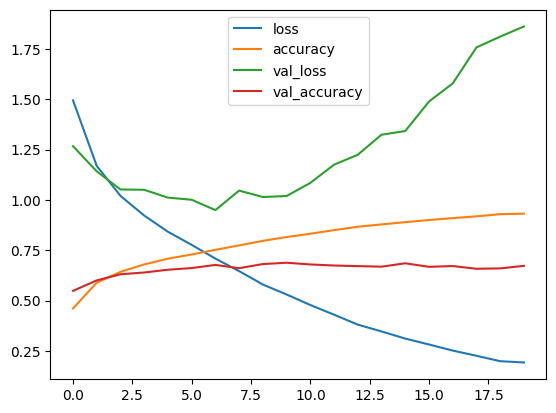

In [18]:
import pandas as pd
pd.DataFrame(history1.history).plot()

Исходя из анализа, можно сделать вывод о сложности выработки четких правил установки соотношения параметров для достижения наилучших показателей при использовании нейросетей. Также, можно сказать, что сеть ResNet50, по всей видимости, не очень подходят для обработки датасета Cifar10 (результат можно увидеть в первых вариациях нейросети). Правильная установка слоев очень важна.
Исходя из результатов базовой модели мы получили точность обучения 88% а точность тестирования 65% что намного лучше того что было в первый вариантах. Потери при проверке значительно увеличиваются, что означает, что наша модель переобучается. Чтобы уменьшить переобучение мы можем добавить больше данных, упростить модель или сделать регуляризацию. В нашем случает лучше всего подходит регуляризация. Для cifar100 и Imagenet нужно будет усложнять модель и добавлять болльше данных так как они более обьемные и неоднородные. Для mnist лучше использовать рекуррентные нейронные сети и работать в режиме ЧБ.
